<a href="https://colab.research.google.com/github/Sonali-Kotni57/LGMVIP-DataScience/blob/main/Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Flowers Classification ML Project**

**Beginner Level Task**

**Sonali Kotni**

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**IMPORTING THE DATASET**

In [2]:
iris_data=pd.read_csv("/content/sample_data/Iris.csv")

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**CHECKING THE NULL OR NaN DATA PRESENT IN THE DATASET**

In [4]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**PAIR PLOT** 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


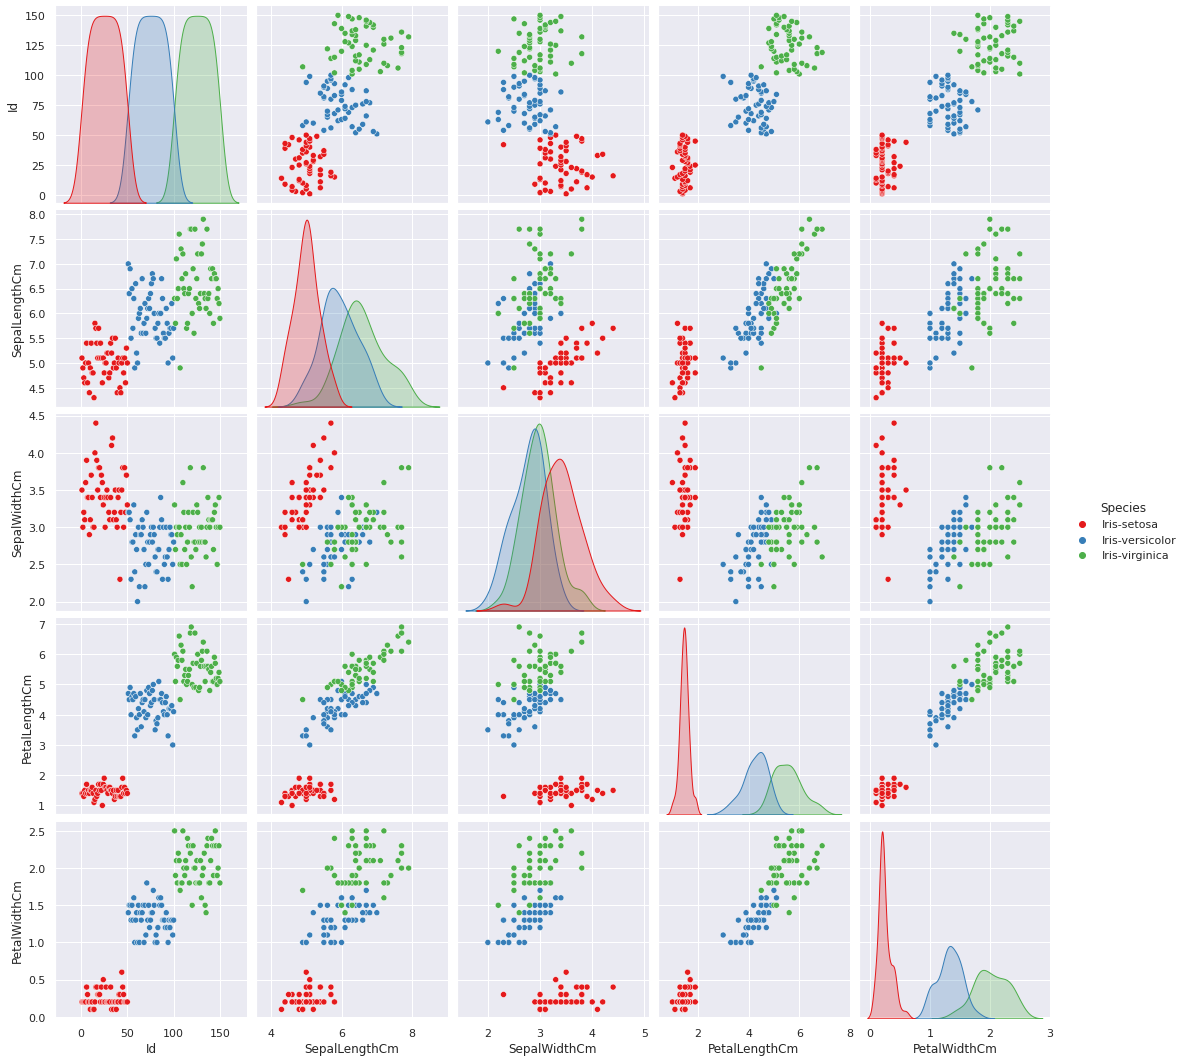

In [5]:
sns.pairplot(iris_data, hue='Species', size=3 ,palette='Set1')


In [10]:
species = pd.get_dummies(iris_data['Species'])

In [12]:
iris_data.pop('Species')

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [13]:
iris_data= pd.concat([iris_data,species],axis = 1)
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [15]:
iris_data.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

**PREPROCESSING**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='object')

In [19]:
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = species

In [20]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_features = scaler.transform(X)

In [22]:
df_feat = pd.DataFrame(scaled_features,columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df_feat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [23]:
df_feat = pd.concat([df_feat,species],axis = 1)
df_feat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1,0,0
1,-1.143017,-0.124958,-1.341272,-1.312977,1,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,1,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,1,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,1,0,0
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0,0,1
146,0.553333,-1.281972,0.705893,0.922064,0,0,1
147,0.795669,-0.124958,0.819624,1.053537,0,0,1
148,0.432165,0.800654,0.933356,1.447956,0,0,1


**GENERATING THE MODEL**

**TRAIN_TEST_SPLIT**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat,species,test_size = 0.3, random_state = 42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7)


**MODEL FITTING**

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

**CLASSIFICATION REPORT**

In [29]:
from sklearn.metrics import classification_report

In [30]:
predictions = knn.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45

